# 시계열 데이터 분석 (정석)

ACF plot과 PACF plot을 통해 모수를 추정하여 차분을 수행하여 분석하는 방법

## #01. 작업준비

### 패키지 참조

In [58]:
from pandas import read_excel
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import seaborn as sb
import datetime
import sys

### 데이터 가져오기

> 이미 앞 예제를 통해 데이터가 비정상성임을 확인함

In [38]:
df = read_excel("https://data.hossam.kr/E06/air_passengers.xlsx")
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


### 그래프 초기화

In [18]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

## #02. 데이터의 정상성 확인

### 그래프 초기화


In [39]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (15, 5)
plt.rcParams["axes.unicode_minus"] = False

### 데이터 시각화

<Axes: xlabel='Month', ylabel='Passengers'>

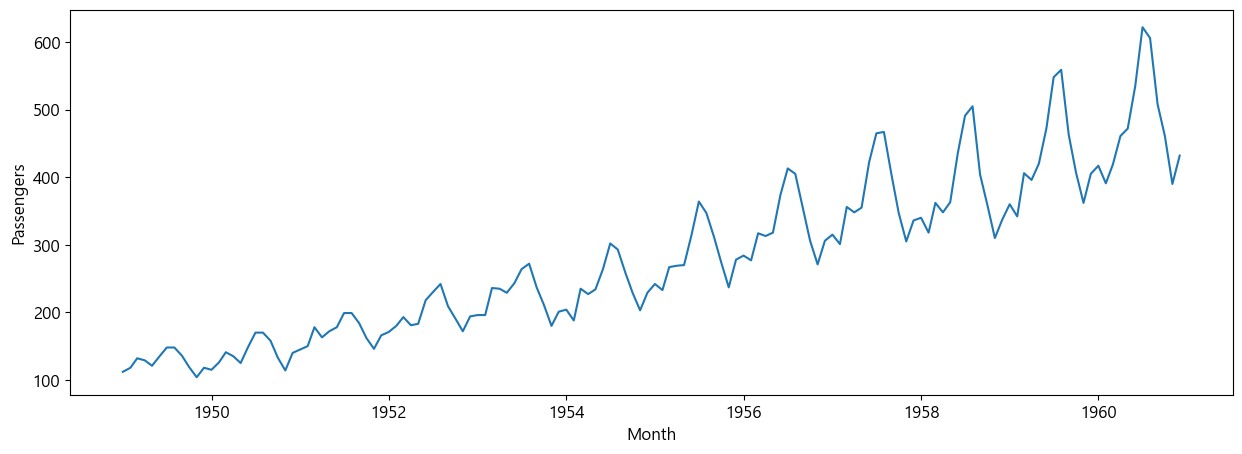

In [40]:
plt.figure()
sb.lineplot(data=df,y='Passengers',x="Month")

### 원본 데이터에 대한 ADF 테스트
#### ADF 테스트에 대한 가설

|가설|내용|
|--|--|
|귀무가설|데이터가 정상성을 띄지 않음|
|대립가설|데이터가 정상성을 띔|


In [43]:
ar = adfuller(df['Passengers'])

print("ADF Statistics  :%f" % ar[0])
print("p-value  : %f "% ar[1])
print('num of lags : %f' % ar[2])
print('num of observation : %f'% ar[3])
print('critical values :')
for key, value in ar[4].items():
    print('\t%s : %.3f' % (key,value))


ADF Statistics  :0.815369
p-value  : 0.991880 
num of lags : 13.000000
num of observation : 130.000000
critical values :
	1% : -3.482
	5% : -2.884
	10% : -2.579


### 1차 차분 수행
p값이 0.05보다 크므로 작아질 때 까지 차분 수행해야함

In [44]:
diff = df['Passengers'].diff().dropna()
diff

1       6.0
2      14.0
3      -3.0
4      -8.0
5      14.0
       ... 
139   -16.0
140   -98.0
141   -47.0
142   -71.0
143    42.0
Name: Passengers, Length: 143, dtype: float64

### 차분 결과 시각화
평균은 0으로 일정해 지는 것으로 보이나 뒤로 갈 수록 점점 간격이 커지는 것으로 보아 분산은 일정하지 않은것으로 보임,.

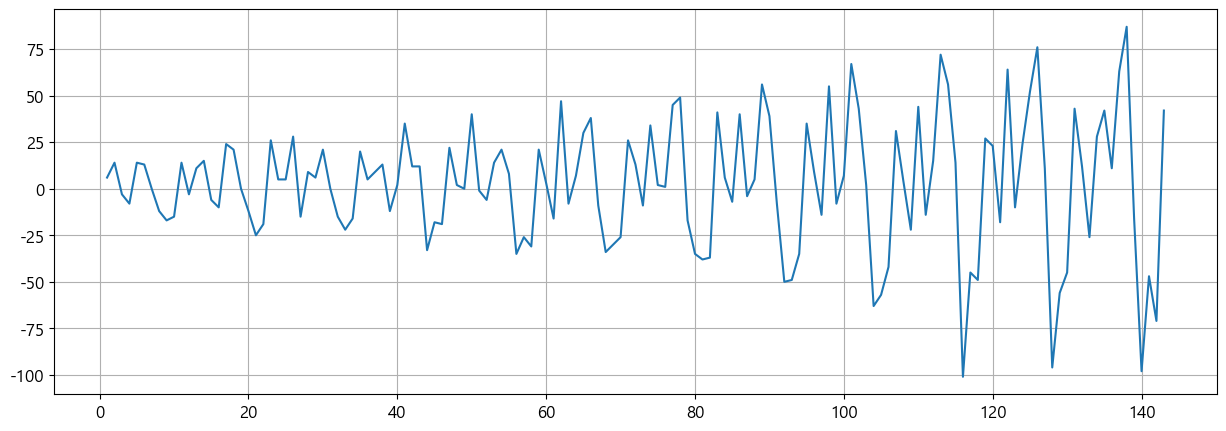

In [47]:
plt.figure()
sb.lineplot(x=diff.index,y = diff.values)
plt.grid()
plt.show()
plt.close()

### 차분 결과에 대한 ADF 테스트 
### 원본 데이터에 대한 ADF 테스트

ACF, PACF Plot으로 적용할 모델을 결정한다면 차분을 몇 번 수행하는 것이 좋을지 결정해야 한다.

| 모델 | 의미 |
|---|---|
| $AR(n)$ | $ARIMA(p,d,q)$ 중에서 $p=n, q=0$이라는 의미 |
| $MA(n)$ | $ARIMA(p,d,q)$ 중에서 $p=0, q=n$이라는 의미 |

ADF 테스트의 결과로 차분의 횟수가 결정되면 이 값이 $d$를 의미함.

#### ADF 테스트의 가설

| 가설 | 내용 |
|---|---|
| 귀무가설 | 데이터가 정상성과 다르다 (=비정상성임을 의미) |
| 대립가설 | 데이터가 정상성이다. |

p값이 0.05보다 아직 크므로 정상성을 만족하지 않지만, 1회정도 추가로 차분 수행(여기서는 생략)


In [49]:
ar= adfuller(diff.values)
print('ADF Statistic: %f' % ar[0])
print('p-value: %f' % ar[1])
print('num of lags: %f' % ar[2])
print('num of observations: %f' % ar[3])
print('Critical Values:')
for key, value in ar[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.829267
p-value: 0.054213
num of lags: 12.000000
num of observations: 130.000000
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


## #03. ACF, PACF 검정

정상 시계열 데이터의 경우, ACF는 상대적으로 빠르게 0(상관관계 0)에 접근한다.

비정상 시계열 데이터의 경우, ACF는 천천히 감소하며 종종 큰 양의 값을 갖는다.

| 구분 | $AR(p)$ 모델 적합 | $MA(q)$ 모델 적합 |
|---|---|---|
| ACF plot | 천천히 감소 | 첫 값으로부터 $q$개 뒤에 끊긴다. |
| PACF plot | 첫 값으로부터 $p$개 뒤에 끊긴다. | 천천히 감소 |

### ACF Plot

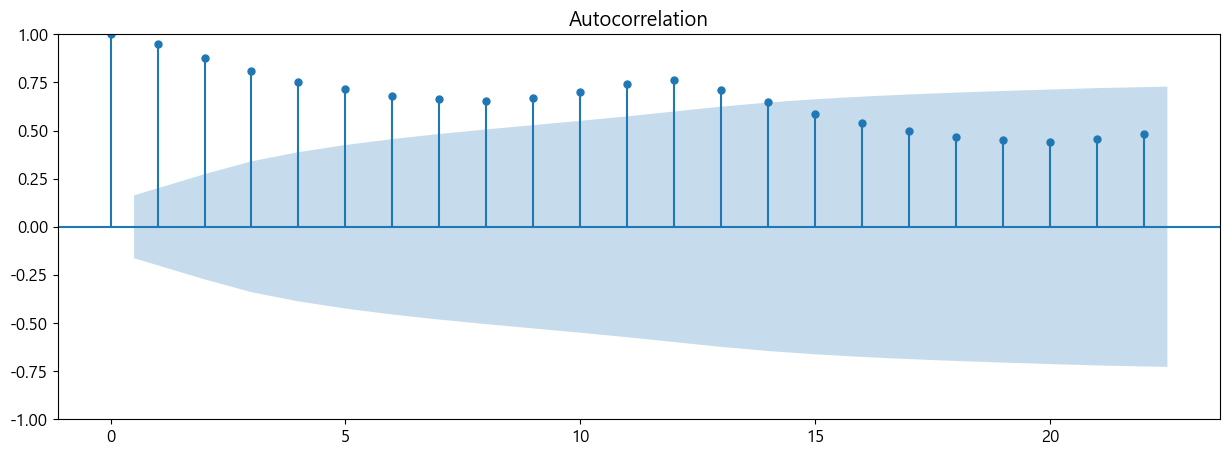

In [50]:
plot_acf(df['Passengers'])
plt.show()
plt.close()

### PACF Plot

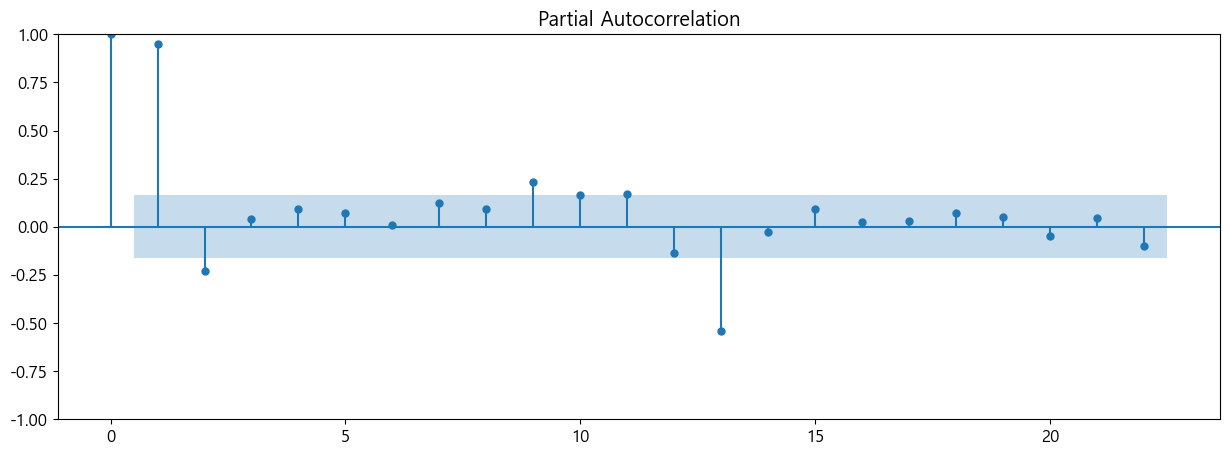

In [51]:
plot_pacf(df['Passengers'])
plt.show()
plt.close()

#### 결과 판정

| 구분 | ACF plot | PACF plot |
|---|---|---|
| 감소 | 상대적으로 급격 | 상대적으로 완만 |
| 파란박스 진입 지점 | $p=1$ | $q=1$ |

이 결과를 고려하여 완만함을 보이는 PACF 플롯을 채택 

$AR(1)$ 모델로 결정

p-value가 0.05보다 작으므로 대립가설 채택 -> 데이터가 정상성을 띔. 

만약 귀무가설이 채택되면 p-value가 0.05보다 낮아질 때 까지 차분 수행

차분을 반복한 횟수가 d 값이 됨.

## #03. ARIMA 분석 수행

In [53]:
model = ARIMA(df['Passengers'], order=(1,1,0))
fit = model.fit()
# model = ARIMA(diff1['age'],or1,1))
# fit = model.fit(transformed=True)der=(0,
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -698.926
Date:                Thu, 03 Aug 2023   AIC                           1401.852
Time:                        12:04:02   BIC                           1407.778
Sample:                             0   HQIC                          1404.260
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3066      0.080      3.849      0.000       0.150       0.463
sigma2      1029.2429    103.738      9.922      0.000     825.920    1232.566
Ljung-Box (L1) (Q):                   0.66   Jarque-

### 학습결과에 대한 예측값 생성


In [63]:
start_index = 0 
end_index = len(df['Passengers'])
pd = fit.predict(start=start_index,end=end_index)
pd

0        0.000000
1      112.038959
2      119.839303
3      136.291707
4      128.080349
          ...    
140    601.095192
141    477.958052
142    446.592127
143    368.234915
144    444.875121
Name: predicted_mean, Length: 145, dtype: float64

### 이후 10 단계의 예측값 생성

In [64]:
fc = fit.forecast(10)
fc

144    444.875121
145    448.821995
146    450.031912
147    450.402812
148    450.516512
149    450.551367
150    450.562051
151    450.565327
152    450.566331
153    450.566639
Name: predicted_mean, dtype: float64

### 관측치와 예측치의 비교결과 시각화



In [65]:
x= list(range(0,len(df),20))

In [66]:
xlabels=[]
for i in x : 
    xlabels.append(df.loc[i,'Month'].strftime('%Y-%m-%d'))
xlabels

['1949-01-01',
 '1950-09-01',
 '1952-05-01',
 '1954-01-01',
 '1955-09-01',
 '1957-05-01',
 '1959-01-01',
 '1960-09-01']

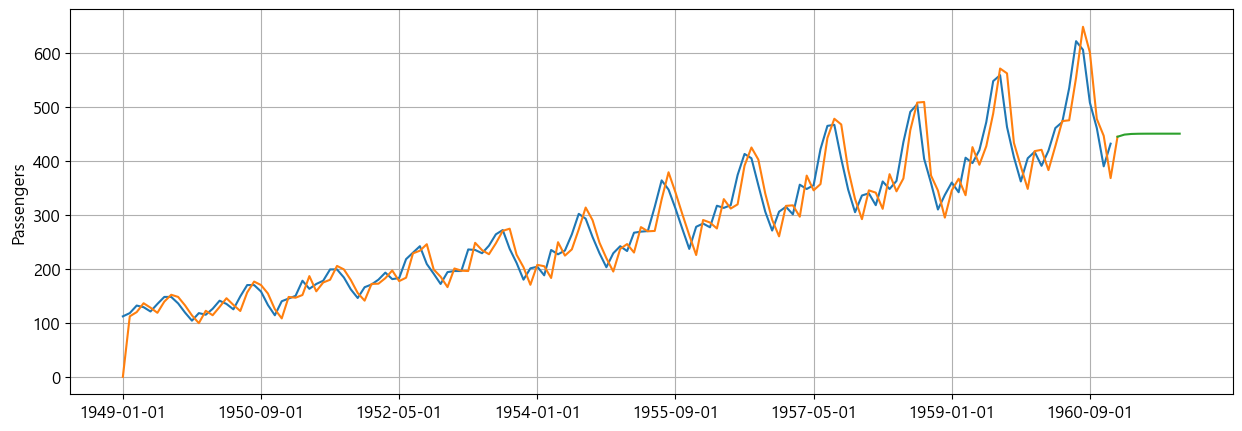

In [67]:
plt.figure()
sb.lineplot(x=df.index, y=df['Passengers']) # 원본
sb.lineplot(x=pd.index, y=pd)           # 원본을 토대로 학습하여 예측한 값
sb.lineplot(x=fc.index, y=fc)           # 이후 10단계를 예측한 값

plt.xticks(x, xlabels, rotation=0)

plt.grid()
plt.show()
plt.close()

### #05. Auto ARIMA 

최적의 ARIMA 모델을 자동으로 찾아서 검색을 수행해 주는 기능
### 원본 데이터에 대한 분석 수행
예제 데이터에서는 파라미터를 변경하여 수행한 결과와 기본 값 만으로 수행한 결과가 동일하였다 .

In [68]:
model = auto_arima(x=df['Month'],
                   y=df['Passengers'],
                   d=1,
                   start_p=1,
                   max_p=3,
                   start_q=1,
                   max_q=3,
                   seasonal=True,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.51 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

### 분석결과 확인

In [69]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -682.543
Date:                Thu, 03 Aug 2023   AIC                           1377.086
Time:                        12:10:27   BIC                           1394.863
Sample:                             0   HQIC                          1384.310
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2580      0.135      1.914      0.056      -0.006       0.522
ar.L2          0.3732      0.136      2.736      0.006       0.106       0.641
ar.L3         -0.3367      0.125     -2.684      0.0